In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data from a csv file.
path ="/content/drive/MyDrive/Colab Notebooks/sheet1.csv"
df =  pd.read_csv(path)

In [ ]:
df.head()

,tunnel_depth,w,x_d,he,crown_disp
0,10,15,0.5,3,24.6
1,10,15,0.5,6,47.4
2,10,15,0.5,9,65.8
3,10,15,0.5,12,71.3
4,10,15,0.5,15,63.3


In [ ]:
df.tail()

,tunnel_depth,w,x_d,he,crown_disp
535,20,30,4.5,3,2.2
536,20,30,4.5,6,3.9
537,20,30,4.5,9,5.5
538,20,30,4.5,12,6.8
539,20,30,4.5,15,8.0


In [ ]:
# Check for missing values
df.isnull().sum()

tunnel_depth    0
w               0
x_d             0
he              0
crown_disp      0
dtype: int64

In [ ]:
df.describe()

,tunnel_depth,w,x_d,he,crown_disp
count,540.000000,540.000000,540.000000,540.000000,540.000000
mean,15.000000,22.500000,2.500000,9.000000,29.821111
std,4.086268,5.595353,1.292191,4.246575,21.498188
min,10.000000,15.000000,0.500000,3.000000,2.200000
25%,10.000000,18.750000,1.500000,6.000000,12.975000
50%,15.000000,22.500000,2.500000,9.000000,23.750000
75%,20.000000,26.250000,3.500000,12.000000,42.500000
max,20.000000,30.000000,4.500000,15.000000,98.200000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Extract the independent variables
X = df.iloc[:, :-1].values

In [ ]:
# Extract the dependent variable
y = df.iloc[:, -1].values

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

In [ ]:
# Normalize the independent variables
X_normalized = scaler.fit_transform(X)

In [ ]:
# Print the normalized data
print(X_normalized)

[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.25]
 [0.   0.   0.   0.5 ]
 ...
 [1.   1.   1.   0.5 ]
 [1.   1.   1.   0.75]
 [1.   1.   1.   1.  ]]


In [ ]:
# Combine the normalized independent variables with the dependent variable
df_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])
df_normalized['crown_disp'] = y

In [ ]:
df_normalized

,tunnel_depth,w,x_d,he,crown_disp
0,0.0,0.0,0.0,0.00,24.6
1,0.0,0.0,0.0,0.25,47.4
2,0.0,0.0,0.0,0.50,65.8
3,0.0,0.0,0.0,0.75,71.3
4,0.0,0.0,0.0,1.00,63.3
...,...,...,...,...,...
535,1.0,1.0,1.0,0.00,2.2
536,1.0,1.0,1.0,0.25,3.9
537,1.0,1.0,1.0,0.50,5.5
538,1.0,1.0,1.0,0.75,6.8


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the independent variables and dependent variable
X = df_normalized.drop(['crown_disp'], axis=1)
y = df_normalized['crown_disp']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Perform cross-validation to find optimal hyperparameters
param_grid = {'max_depth': range(1, 11),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11)}

rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)

# Train the model on the training data with optimal hyperparameters
rf = RandomForestRegressor(**rf_cv.best_params_)
rf.fit(X_train, y_train)

# Evaluate the model with cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest cross-validation scores: {}".format(rf_scores))
print("Mean Random Forest cross-validation score: {:.2f}".format(np.mean(rf_scores)))

# Predict the values of y for the test data
y_pred = rf.predict(X_test)

# Compute the R-squared score of the model
r2_score_rf = r2_score(y_test, y_pred)
print('Random Forest R-squared:', r2_score_rf)


Random Forest cross-validation scores: [0.98386126 0.98063635 0.98678558 0.98165421 0.985541  ]
Mean Random Forest cross-validation score: 0.98
Random Forest R-squared: 0.983410250971214


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# Train a random forest regression model on the training data
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predict the values of y for the test data using the trained random forest model
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
pi = 100 * (1 - np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test))
bf = np.mean(y_pred)/np.mean(y_test)
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
rpd = 100 * np.mean((y_test - y_pred) / np.mean(y_test))
mbe = np.mean(y_test - y_pred)
wilmott = 1 - np.sum((y_test - y_pred)**2) / np.sum((np.abs(y_pred - np.mean(y_test)) + np.abs(y_test - np.mean(y_test)))**2)
lm_range = np.max(y_test) - np.min(y_test)
lmcc_range = np.sum(np.abs(y_pred - np.mean(y_test))) + np.sum(np.abs(y_test - np.mean(y_test)))
gpi = 1 - (lmcc_range / lm_range)
ns = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
vaf = (1 - np.var(y_test - y_pred) / np.var(y_test)) * 100
nmbe = np.mean((y_test - y_pred) / np.mean(y_test))
r2_score = r2_score(y_test, y_pred)



In [ ]:
from prettytable import PrettyTable

# Define the column names for the table
column_names = ["Evaluation Metric", "Value"]

# Create a new table with the defined column names
table = PrettyTable(column_names)

# Add rows to the table
table.add_row(["MAE", "{:.2f}".format(mae)])
table.add_row(["RMSE", "{:.2f}".format(rmse)])
table.add_row(["%PI", "{:.2f}".format(pi)])
table.add_row(["BF", "{:.2f}".format(bf)])
table.add_row(["MAPE", "{:.2f}%".format(mape)])
table.add_row(["RPD", "{:.2f}".format(rpd)])
table.add_row(["MBE", "{:.2f}".format(mbe)])
table.add_row(["Willmott", "{:.2f}".format(wilmott)])
table.add_row(["GPI", "{:.2f}".format(gpi)])
table.add_row(["NS", "{:.2f}".format(ns)])
table.add_row(["VAF", "{:.2f}%".format(vaf)])
table.add_row(["NMBE", "{:.2f}%".format(nmbe)])
table.add_row(["R-squared", "{:.2f}".format(r2_score)])

# Print the table
print(table)


+-------------------+--------+
| Evaluation Metric | Value  |
+-------------------+--------+
|        MAE        |  1.88  |
|        RMSE       |  2.62  |
|        %PI        | 91.35  |
|         BF        |  1.02  |
|        MAPE       | 6.26%  |
|        RPD        | -1.64  |
|        MBE        | -0.50  |
|      Willmott     |  1.00  |
|        GPI        | -40.70 |
|         NS        |  0.98  |
|        VAF        | 98.47% |
|        NMBE       | -0.02% |
|     R-squared     |  0.98  |
+-------------------+--------+


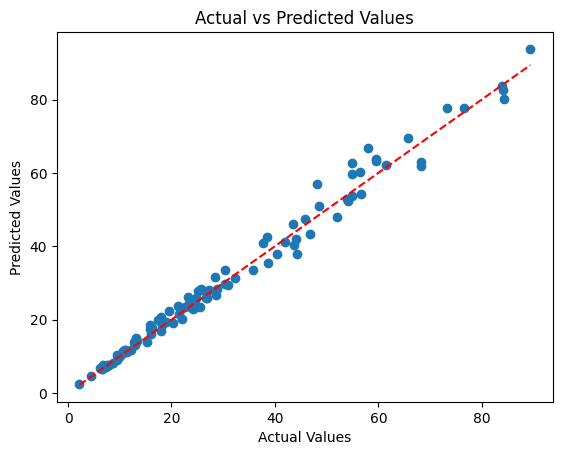

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Set the title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

In [ ]:
from prettytable import PrettyTable

# Get the actual and predicted values of y for the test data
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calculate the difference (error) between the actual and predicted values
error = y_test - y_pred

# Create a pretty table to display the actual, predicted, and error values
table = PrettyTable()
table.field_names = ["Actual", "Predicted", "Error"]

# Add the data to the table
for i in range(len(y_test)):
    table.add_row([round(y_test[i], 2), round(y_pred[i], 2), round(error[i], 2)])

# Print the table
print(table)


+--------+-----------+-------+
| Actual | Predicted | Error |
+--------+-----------+-------+
|  84.0  |   83.74   |  0.26 |
|  32.2  |   31.31   |  0.89 |
|  13.4  |   14.08   | -0.68 |
|  10.0  |   10.05   | -0.05 |
|  42.0  |   41.08   |  0.92 |
|  22.0  |   20.09   |  1.91 |
|  21.9  |    23.0   |  -1.1 |
|  48.5  |   51.09   | -2.59 |
|  22.6  |   23.37   | -0.77 |
|  25.9  |   28.08   | -2.18 |
|  37.7  |   40.99   | -3.29 |
|  28.8  |   28.37   |  0.43 |
|  19.0  |   19.26   | -0.26 |
|  7.6   |    7.73   | -0.13 |
|  76.6  |   77.75   | -1.15 |
|  11.1  |   11.73   | -0.63 |
|  8.7   |    8.24   |  0.46 |
|  44.2  |   37.79   |  6.41 |
|  9.5   |   10.25   | -0.75 |
|  18.0  |   20.67   | -2.67 |
|  43.5  |   45.95   | -2.45 |
|  18.1  |   18.64   | -0.54 |
|  27.2  |   28.15   | -0.95 |
|  24.6  |   23.73   |  0.87 |
|  24.0  |   23.21   |  0.79 |
|  65.8  |   69.52   | -3.72 |
|  23.1  |   23.95   | -0.85 |
|  9.9   |    10.1   |  -0.2 |
|  15.8  |   18.59   | -2.79 |
|  6.6  